### Import packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Keras expects numpy arrays as input
import numpy as np

#Plotting tools
import matplotlib.pyplot as plt
%matplotlib inline

#Import the dataset and a data munging utility
from keras.datasets import mnist
from keras.utils import np_utils

#Import the required neural network components
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


### Load data, rescale, and reshape

In [12]:
#Import some data to demonstrate encoding process
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

#Normalize the values
xTrain = xTrain.astype('float32') / 255.
xTest = xTest.astype('float32') / 255.

#Reshape matrices as vectors
xTrain = xTrain.reshape(xTrain.shape[0],np.prod(xTrain.shape[1:]))
xTest = xTest.reshape(xTest.shape[0],np.prod(xTest.shape[1:]))

#Convert the targets into categorical variables
yTrain = np_utils.to_categorical(yTrain,10)
yTest = np_utils.to_categorical(yTest,10)

#Verify that each image has been converted to a vector of length 784
print ""
print "{} training samples".format(xTrain.shape[0])
print "{} testing samples".format(xTest.shape[0])


60000 training samples
10000 testing samples


### Show some examples of the images

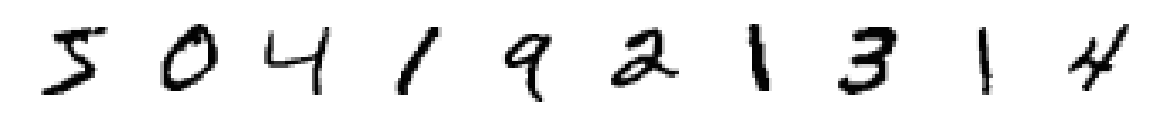

In [13]:
plt.figure(figsize=(20, 4))

for i in range(10):
    ax = plt.subplot(1, 10, i + 1)
    
    plt.imshow((1-xTrain[i]).reshape(28, 28))
    
    plt.gray()
    ax.axis('off')

plt.show()

### Create a neural network

In [5]:
#Build and train the model
model = Sequential()

model.add(Dense(10,activation='relu',input_shape=(784,)))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='softmax'))

#should this be cross-entropy?
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
history = model.fit(xTrain,yTrain,epochs=1,verbose=2)

Epoch 1/1
6s - loss: 0.3036 - acc: 0.9133


### Predict a few digits and compare to the actual value

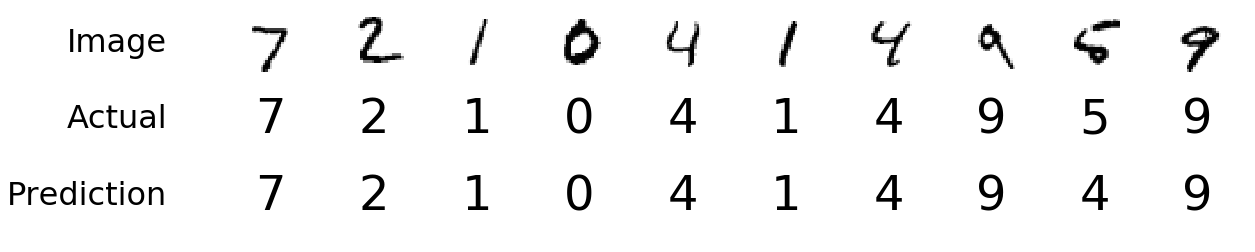

In [14]:
#Predict values from the test set
predictions = model.predict(xTest)
predictions = np.array([np.argmax(x) for x in predictions])
targets = np.array([np.argmax(x) for x in yTest])

#Show the before-and-after for a few examples
nDisplay = 10
plt.figure(figsize=(20, 4))

ax = plt.subplot(3, nDisplay + 1, 1)
plt.text(.5,.5,"Image",fontsize=32,verticalalignment="center",horizontalalignment="right")
ax.axis('off')

ax = plt.subplot(3, nDisplay + 1, nDisplay + 2)
plt.text(.5,.5,"Actual",fontsize=32,verticalalignment="center",horizontalalignment="right")
ax.axis('off')

ax = plt.subplot(3, nDisplay + 1, 2 * nDisplay + 3)
plt.text(.5,.5,"Prediction",fontsize=32,verticalalignment="center",horizontalalignment="right")
ax.axis('off')

for i in range(nDisplay):
    #Original images
    ax = plt.subplot(3, nDisplay + 1, i + 2)
    
    plt.imshow((1-xTest[i]).reshape(28, 28))
    
    plt.gray()
    ax.axis('off')

    #Display actual value
    ax = plt.subplot(3, nDisplay + 1, i + 3 + nDisplay)
    plt.text(.5,.5,str(targets[i]),fontsize=48,verticalalignment="center",horizontalalignment="center")    
    ax.axis('off')

    #Display predicted value
    ax = plt.subplot(3, nDisplay + 1, i + 4 + 2 * nDisplay)
    plt.text(.5,.5,str(predictions[i]),fontsize=48,verticalalignment="center",horizontalalignment="center")
    ax.axis('off')

plt.show()

### Report the total accuracy for the entire test set

In [15]:
errors = np.count_nonzero(predictions - targets)
print "Accuracy rate: {:.2%}".format(1 - errors/float(len(predictions)))

Accuracy rate: 92.03%


# Hall of Shame

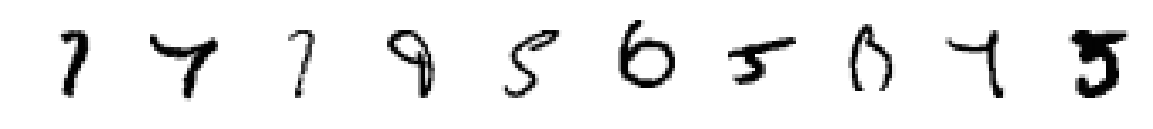

In [10]:
offenders = [111, 124, 175, 193, 211, 259, 317, 324, 358, 412]
plt.figure(figsize=(20, 4))

for i in range(10):
    #Original images
    ax = plt.subplot(1, 10, i + 1)
    
    plt.imshow((1-xTest[offenders[i]]).reshape(28, 28))
    
    plt.gray()
    ax.axis('off')

plt.show()

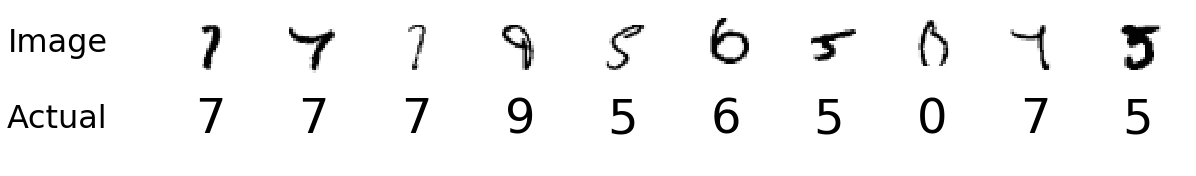

In [11]:
#Show the offending numbers with their labels
nDisplay = 10
plt.figure(figsize=(20, 4))

ax = plt.subplot(3, nDisplay + 1, 1)
plt.text(.5,.5,"Image",fontsize=32,verticalalignment="center",horizontalalignment="right")
ax.axis('off')

ax = plt.subplot(3, nDisplay + 1, nDisplay + 2)
plt.text(.5,.5,"Actual",fontsize=32,verticalalignment="center",horizontalalignment="right")
ax.axis('off')

for i in range(nDisplay):
    #Original images
    ax = plt.subplot(3, nDisplay + 1, i + 2)
    
    plt.imshow((1-xTest[offenders[i]]).reshape(28, 28))    
    
    plt.gray()
    ax.axis('off')

    #Display actual value
    ax = plt.subplot(3, nDisplay + 1, i + 3 + nDisplay)
    plt.text(.5,.5,str(targets[offenders[i]]),fontsize=48,verticalalignment="center",horizontalalignment="center")    
    ax.axis('off')

plt.show()